In [241]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import scipy as sp
import json
from pandas.io.json import json_normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Load Data

In [3]:
with open('/home/csai/Downloads/customersdata.json') as json_data:
    
    orders = pd.DataFrame({'orderId':[],
             'orderAmount':[],
             'orderState':[],
             'orderShippingAddress':[],
             })
    
    customer = {'customerEmail':[]
                ,'customerPhone':[], 
                'customerDevice':[],
               'customerIPAddress':[],
               'customerBillingAddress':[],
               'fraudulent':[]}
    
    
    transactions_ = pd.DataFrame({'transactionId':[]
                ,'orderId':[], 
                'paymentMethodId':[],
               'transactionAmount':[],
               'transactionFailed':[],
               'customer_id':[]})
    
    
    
    paymentMethods=  pd.DataFrame({'paymentMethodId': [],
        'paymentMethodRegistrationFailure': [],
        'paymentMethodType': [],
        'paymentMethodProvider': [],
        'paymentMethodIssuer': []})
    
    for data in json_data:
        
        data_ = json.loads(data)
        
        orders = orders.append(json_normalize(data_['orders']))
        customer['customerEmail'].extend(json_normalize(data_['customer'])['customerEmail'].values)
        customer['customerPhone'].extend(json_normalize(data_['customer'])['customerPhone'].values)
        customer['customerDevice'].extend(json_normalize(data_['customer'])['customerDevice'].values)
        customer['customerIPAddress'].extend(json_normalize(data_['customer'])['customerIPAddress'].values)
        customer['customerBillingAddress'].extend(json_normalize(data_['customer'])['customerBillingAddress'].values)
        customer['fraudulent'].append(data_.get('fraudulent'))
        
        paymentMethods = paymentMethods.append(json_normalize(data_['paymentMethods']))
        transactions_ = transactions_.append(json_normalize(data_['transactions']))
        #transactions_['customer_id'].update(json_normalize(data_['customer'])['customerPhone'])
        transactions_['customer_id'].fillna(json_normalize(data_['customer'])['customerPhone'],inplace=True)
        transactions_.fillna(method='ffill',inplace=True)
        #transactions['paymentMethodId'].extend(json_normalize(data_['paymentMethods'])['paymentMethodId'])
        
        #transactions['customer_id'].extend(json_normalize(data_['customer'])['customerPhone'])
customer = pd.DataFrame(customer)

/home/csai/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [4]:
data_trans = transactions_.merge(customer,left_on ='customer_id',right_on ='customerPhone')
data_order_trans = data_trans.merge(orders,on='orderId')
data= data_order_trans.merge(paymentMethods,on='paymentMethodId')

In [5]:
data.head()

,customer_id,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,fraudulent,orderAmount,orderShippingAddress,orderState,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,400-108-5415,vjbdvd,wt07xm68b,18.0,0.0,a9lcj51r,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",False,18.0,"5493 Jones Islands\nBrownside, CA 51896",pending,Citizens First Banks,JCB 16 digit,1.0,card
1,400-108-5415,yp6x27,wt07xm68b,26.0,0.0,y4wcv03i,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",False,26.0,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,Citizens First Banks,JCB 16 digit,1.0,card
2,1-788-091-7546,nlghpa,41ug157xz,45.0,0.0,5mi94sfw,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,45.0,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,Bastion Banks,American Express,0.0,bitcoin
3,1-788-091-7546,uw0eeb,41ug157xz,23.0,0.0,br8ba1nu,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,23.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,Bastion Banks,American Express,0.0,bitcoin
4,1-788-091-7546,bn44oh,y3xp697jx,43.0,1.0,a33145ss,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,43.0,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,Solace Banks,VISA 16 digit,1.0,bitcoin


In [23]:
# Shape of the data
data.shape

(623, 19)

In [24]:
# there are 19 columns and 623 rows

In [6]:
# missing values
data.isnull().sum()

customer_id                         0
orderId                             0
paymentMethodId                     0
transactionAmount                   0
transactionFailed                   0
transactionId                       0
customerEmail                       0
customerPhone                       0
customerDevice                      0
customerIPAddress                   0
customerBillingAddress              0
fraudulent                          0
orderAmount                         0
orderShippingAddress                0
orderState                          0
paymentMethodIssuer                 0
paymentMethodProvider               0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
dtype: int64

In [29]:
# There were missing values during the time of loading but i have nt considered them 

In [6]:
# Removed Pending Status 
data_ = data[data['orderState'] != 'pending']

In [7]:
# Statistical analysis

In [215]:
fraud_ = []
fraud__ =[]
for fraud in data['fraudulent']:
    if fraud is True:
        fraud_.append(1)
        fraud__.append('yes')
    else:
        fraud_.append(0)
        fraud__.append('no')
        
data['fraud'] = fraud_
data['fraud_'] = fraud__

In [138]:
data[['transactionAmount',
       'transactionFailed','fraud']].describe()

,transactionAmount,transactionFailed,fraud
count,623.000000,623.000000,623.000000
mean,34.598716,0.269663,0.412520
std,20.360247,0.444141,0.492683
min,10.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,34.000000,0.000000,0.000000
75%,45.000000,1.000000,1.000000
max,353.000000,1.000000,1.000000


In [139]:
# from the above we can see that transaction amount ranges from 10 to 353 

In [140]:
# we will look at the distribution by histogram and we can see that amount is right skewed and very few large amounts

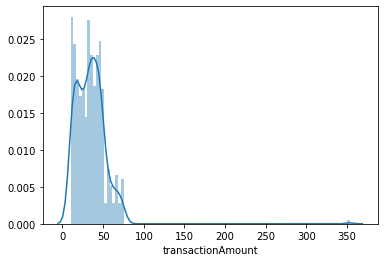

In [141]:
sns.distplot(a = data['transactionAmount'],bins=100)

Text(0.5, 1.0, 'Fraud Trnx distribution in dataset')

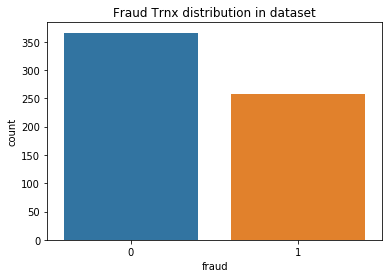

In [142]:
# total fraud 

data['fraud'].value_counts().reset_index()
sns.countplot(data['fraud'])
plt.title('Fraud Trnx distribution in dataset')

Text(0.5, 1.0, 'paymentMethodIssuer')

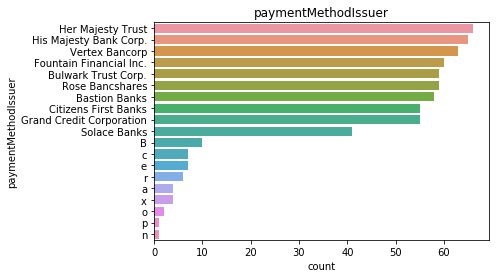

In [143]:
sns.countplot(y=data['paymentMethodIssuer'],order=data['paymentMethodIssuer'].value_counts().reset_index()['index'])
plt.title('paymentMethodIssuer')

Text(0.5, 1.0, 'paymentMethodProvider ')

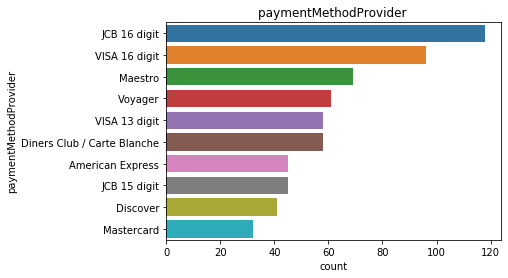

In [144]:
sns.countplot(y=data['paymentMethodProvider'],order=data['paymentMethodProvider'].value_counts().reset_index()['index'])
plt.title('paymentMethodProvider ')

Text(0.5, 1.0, 'paymentMethodType ')

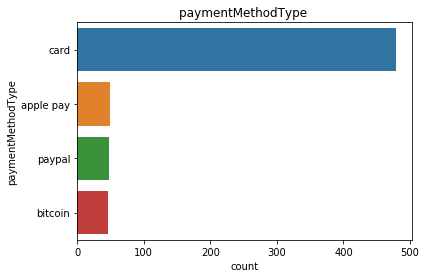

In [145]:
sns.countplot(y=data['paymentMethodType'],order=data['paymentMethodType'].value_counts().reset_index()['index'])
plt.title('paymentMethodType ')

Text(0.5, 1.0, 'Failed Trnx distribution in dataset')

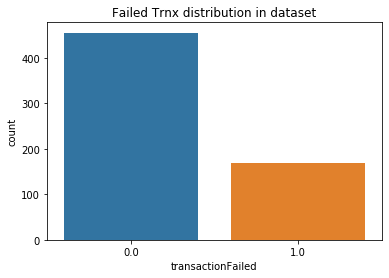

In [146]:
sns.countplot(data['transactionFailed'])
plt.title('Failed Trnx distribution in dataset')

In [147]:
address_street =[]
for order in data['orderShippingAddress']:
    address_street.append(order.split('\n')[0])
    
data['address_street'] = address_street
#data['address_place '] = address_place 


Text(0.5, 1.0, 'Address_Street')

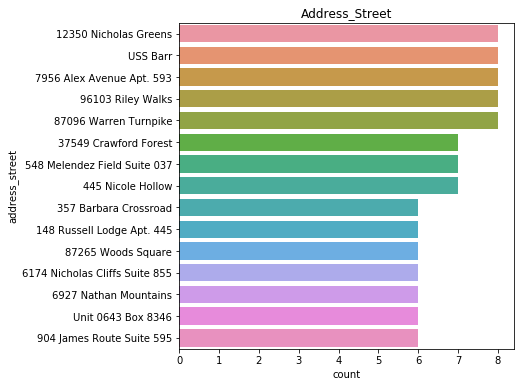

In [148]:
plt.figure(figsize=(6,6))
sns.countplot(y=data['address_street'],order=data['address_street'].value_counts().reset_index()['index'][:15])
plt.title('Address_Street')

In [149]:
address_place = {}
for order in data['orderShippingAddress']:
    if order.split('\n')[1].split(',')[0] in address_place.keys():
        address_place[order.split('\n')[1].split(',')[0]] += 1
    else:
        address_place[order.split('\n')[1].split(',')[0]] = 1

In [150]:
address_place= pd.DataFrame([address_place]).T.reset_index().rename(columns={'index':'Places',0:'Values'})

In [151]:
address_place= address_place.sort_values(by='Values',ascending=False)

Text(0.5, 1.0, 'Address_Place')

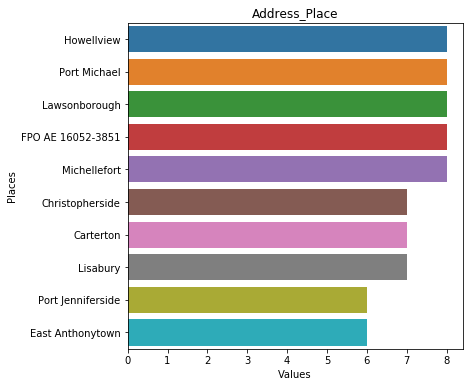

In [152]:
plt.figure(figsize=(6,6))
sns.barplot(y=address_place['Places'][:10],x=address_place['Values'][:10])
plt.title('Address_Place')

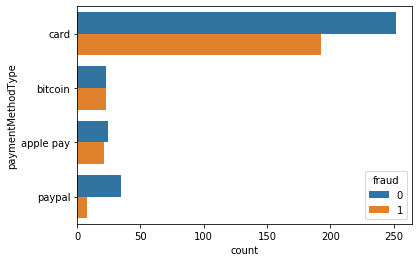

In [170]:
sns.countplot(y=data_['paymentMethodType'],hue=data['fraud'])
# we have equal number of frauds in bitcoin and apple pay 

In [157]:
# amount vs fraud

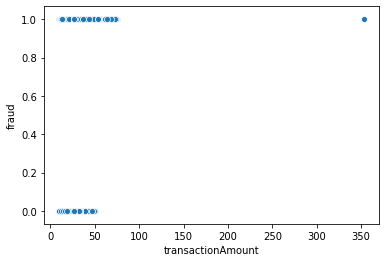

In [212]:
sns.scatterplot(x=data['transactionAmount'],y=data['fraud'])

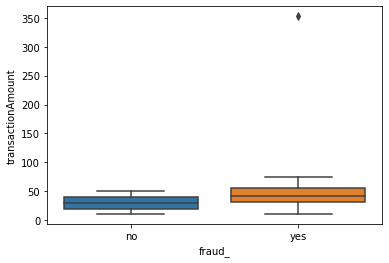

In [220]:
sns.boxplot(y=data['transactionAmount'],x=data['fraud_'],data=data)

In [232]:
data.groupby('paymentMethodRegistrationFailure').sum()['fraud'].reset_index()

,paymentMethodRegistrationFailure,fraud
0,0.0,220
1,1.0,37


In [ ]:
# paymentMethodRegistrationFailure & fraud 

In [159]:
# we can see that extreem amounts are fraud 

In [171]:
# which payment provider has highest fraud

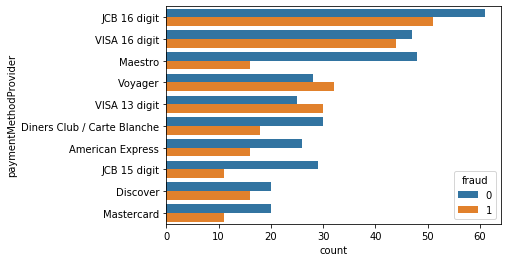

In [169]:
sns.countplot(y=data_['paymentMethodProvider'],hue=data['fraud'],order=data_['paymentMethodProvider'].value_counts().reset_index()['index'])

In [163]:
#voyager and visa 13 digts

In [172]:
data.columns

Index(['customer_id', 'orderId', 'paymentMethodId', 'transactionAmount',
       'transactionFailed', 'transactionId', 'customerEmail', 'customerPhone',
       'customerDevice', 'customerIPAddress', 'customerBillingAddress',
       'fraudulent', 'orderAmount', 'orderShippingAddress', 'orderState',
       'paymentMethodIssuer', 'paymentMethodProvider',
       'paymentMethodRegistrationFailure', 'paymentMethodType', 'fraud',
       'address_street'],
      dtype='object')

In [175]:
L = LabelEncoder()

In [188]:
data['paymentMethodType_encoded']= L.fit_transform(data['paymentMethodType'])
data['paymentMethodProvider_encoded']= L.fit_transform(data['paymentMethodProvider'])
data['paymentMethodIssuer_encoded']= L.fit_transform(data['paymentMethodIssuer'])
data['customerIPAddress_encoded']= L.fit_transform(data['customerIPAddress'])
data['customerDevice_encoded']= L.fit_transform(data['customerDevice'])
data['customerPhone_encode']= L.fit_transform(data['customerPhone'])

In [187]:
data.head()

,customer_id,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,customerEmail,customerPhone,customerDevice,customerIPAddress,...,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,fraud,address_street,paymentMethodType_encoded,paymentMethodProvider_encoded,paymentMethodIssuer_encoded,customerIPAddress_encoded,customerDevice_encoded
0,400-108-5415,vjbdvd,wt07xm68b,18.0,0.0,a9lcj51r,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,...,JCB 16 digit,1.0,card,0,5493 Jones Islands,2,4,3,94,133
1,400-108-5415,yp6x27,wt07xm68b,26.0,0.0,y4wcv03i,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,...,JCB 16 digit,1.0,card,0,5493 Jones Islands,2,4,3,94,133
2,1-788-091-7546,nlghpa,41ug157xz,45.0,0.0,5mi94sfw,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,...,American Express,0.0,bitcoin,1,898 Henry Ports,1,0,1,40,100
3,1-788-091-7546,uw0eeb,41ug157xz,23.0,0.0,br8ba1nu,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,...,American Express,0.0,bitcoin,1,356 Elizabeth Inlet Suite 120,1,0,1,40,100
4,1-788-091-7546,bn44oh,y3xp697jx,43.0,1.0,a33145ss,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,...,VISA 16 digit,1.0,bitcoin,1,5093 Bryan Forks,1,8,9,40,100


Text(0.5, 1.0, 'transactionAmount vs customerIPAddress_encoded')

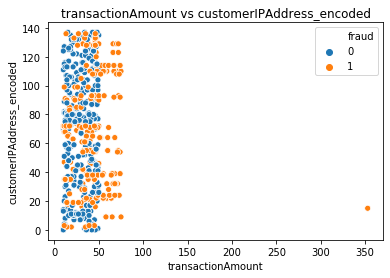

In [199]:
sns.scatterplot(x=data['transactionAmount'],y=data['customerIPAddress_encoded'],hue=data['fraud'])
plt.title('transactionAmount vs customerIPAddress_encoded')

In [201]:
# there are Ip address with fraud labels

In [233]:
# correlation 

In [192]:
corr = data[['transactionAmount',
       'transactionFailed', 
      'paymentMethodType_encoded',
      'paymentMethodProvider_encoded',
      'paymentMethodIssuer_encoded',
      'customerIPAddress_encoded',
      'customerDevice_encoded',
      'customerPhone_encode',
      'paymentMethodRegistrationFailure',  'fraud',
       ]].corr()

In [197]:

corr.style.background_gradient(cmap='viridis').set_precision(2)

,transactionAmount,transactionFailed,paymentMethodType_encoded,paymentMethodProvider_encoded,paymentMethodIssuer_encoded,customerIPAddress_encoded,customerDevice_encoded,customerPhone_encode,paymentMethodRegistrationFailure,fraud
transactionAmount,1,0.0024,-0.064,0.073,-0.02,-0.0011,-0.046,-0.059,0.042,0.33
transactionFailed,0.0024,1,-0.0046,-0.082,-0.039,-0.088,-0.03,0.0035,-0.0012,-0.068
paymentMethodType_encoded,-0.064,-0.0046,1,0.075,-0.038,0.0076,0.064,-0.12,-0.073,-0.098
paymentMethodProvider_encoded,0.073,-0.082,0.075,1,0.13,-0.037,0.079,-0.049,-0.063,0.11
paymentMethodIssuer_encoded,-0.02,-0.039,-0.038,0.13,1,-0.015,-0.037,-0.084,0.04,0.038
customerIPAddress_encoded,-0.0011,-0.088,0.0076,-0.037,-0.015,1,0.077,0.081,0.04,-0.01
customerDevice_encoded,-0.046,-0.03,0.064,0.079,-0.037,0.077,1,-0.016,0.034,0.031
customerPhone_encode,-0.059,0.0035,-0.12,-0.049,-0.084,0.081,-0.016,1,0.15,-0.0071
paymentMethodRegistrationFailure,0.042,-0.0012,-0.073,-0.063,0.04,0.04,0.034,0.15,1,0.031
fraud,0.33,-0.068,-0.098,0.11,0.038,-0.01,0.031,-0.0071,0.031,1


In [235]:
# model

In [238]:
data_1 = data[data['orderState'] != 'pending']

In [447]:
data_model = data_1[['transactionAmount',
       'transactionFailed', 
      'paymentMethodType_encoded',
      'paymentMethodProvider_encoded',
      'paymentMethodIssuer_encoded',
      'customerIPAddress_encoded',
      'customerDevice_encoded',
      'customerPhone_encode',
      'paymentMethodRegistrationFailure',  'fraud',
       ]]

In [448]:
x =data_model.iloc[:,:-1]
y =data_model.iloc[:,-1]

In [449]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [450]:
# will be applying Logistic regression & decision tree 

In [451]:
from sklearn.linear_model import LogisticRegression

In [452]:
from sklearn.preprocessing import scale

In [453]:
x_logis = scale(x)

In [454]:
x_train_logis,x_test_logis,y_train_logis,y_test_logis = train_test_split(x_logis,y,test_size=0.2, random_state=42)

In [455]:
logistic = LogisticRegression(C=0.001)

In [456]:
train_fit = logistic.fit(x_train_logis,y_train_logis)

In [457]:
y_predict = logistic.predict(x_test_logis)

In [458]:
train_fit

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [459]:
from sklearn.metrics import classification_report,confusion_matrix

In [460]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.71      0.86      0.78        70
          1       0.69      0.48      0.56        46

avg / total       0.70      0.71      0.69       116



In [472]:
confusion_matrix(y_test_logis,y_predict)

array([[60, 10],
       [24, 22]])

In [462]:
names_columns = ['transactionAmount', 'transactionFailed', 'paymentMethodType_encoded',
       'paymentMethodProvider_encoded', 'paymentMethodIssuer_encoded',
       'customerIPAddress_encoded', 'customerDevice_encoded',
       'customerPhone_encode', 'paymentMethodRegistrationFailure']

In [463]:
logistic.coef_[0]

array([ 0.06975702, -0.01157706, -0.020884  ,  0.01665006,  0.00220458,
       -0.00099556,  0.00480772,  0.00192744,  0.00978165])

Text(0.5, 1.0, 'LR feature importance')

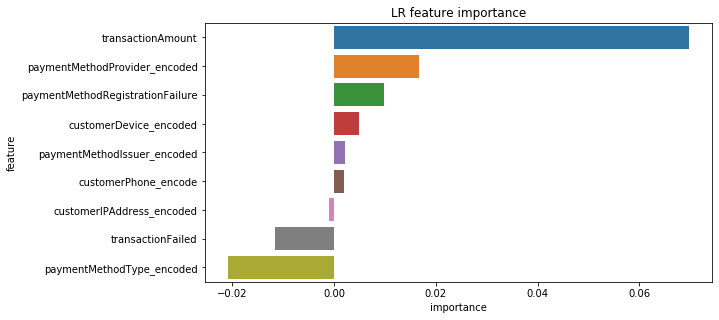

In [464]:
importance = logistic.coef_[0]

plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.6)
plt.subplot2grid((3,2),(0,1))
importance1 = pd.DataFrame({'importance':importance,'feature':names_columns})
importance = importance1.sort_values(by ='importance',ascending=False)
sns.barplot(importance['importance'],importance['feature'])
#plt.xticks(rotation =90)
plt.title('LR feature importance')

In [465]:

from sklearn.tree import DecisionTreeClassifier

In [466]:
dc = DecisionTreeClassifier()

In [467]:
dc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [470]:
y_predict_ = dc.predict(x_test)

In [471]:
confusion_matrix(y_test,y_predict_)

array([[63,  7],
       [ 3, 43]])

In [474]:
print(classification_report(y_test,y_predict_))

             precision    recall  f1-score   support

          0       0.95      0.90      0.93        70
          1       0.86      0.93      0.90        46

avg / total       0.92      0.91      0.91       116



In [476]:
importance= dc.feature_importances_
importance = pd.DataFrame({'importance':importance,'feature':names_columns})
importance = importance.sort_values(by ='importance',ascending=False)
importance

,importance,feature
5,0.268515,customerIPAddress_encoded
0,0.266720,transactionAmount
4,0.198030,paymentMethodIssuer_encoded
6,0.131857,customerDevice_encoded
7,0.093197,customerPhone_encode
3,0.041679,paymentMethodProvider_encoded
1,0.000000,transactionFailed
2,0.000000,paymentMethodType_encoded
8,0.000000,paymentMethodRegistrationFailure
